In [1]:
from itertools import chain
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

In [2]:
def Greville(X):
    vec = X[0].reshape(-1, 1)
    eps = np.float32(1e-9)

    if np.abs(np.dot(vec.T, vec).item()) < eps:
        X_pseudo_inv = vec
    else:
        X_pseudo_inv = vec / np.dot(vec.T, vec).item()

    n_rows, n_columns = X.shape

    for i in range(1, n_rows):
        vec = X[i].reshape(-1, 1)

        Z = np.eye(n_columns) - X_pseudo_inv.dot(X[:i])
        norm = np.dot(np.dot(vec.T, Z), vec).item()

        if np.abs(norm) < eps:
            R = X_pseudo_inv.dot(X_pseudo_inv.T)
            norm = np.dot(np.dot(vec.T, R), vec).item() + 1.
            X_pseudo_inv -= np.dot(np.dot(np.dot(R, vec), vec.T), X_pseudo_inv) / norm
            X_pseudo_inv = np.column_stack((X_pseudo_inv, (np.dot(R, vec) / norm)))
        else:
            norm = np.dot(np.dot(vec.T, Z), vec).item()
            X_pseudo_inv -= np.dot(np.dot(np.dot(Z, vec), vec.T), X_pseudo_inv) / norm
            X_pseudo_inv = np.column_stack((X_pseudo_inv, (np.dot(Z, vec) / norm)))

    return X_pseudo_inv

In [3]:
def pseudo_inv(X, delta):
    n_rows, n_columns = X.shape
    if n_rows > n_columns:
        X_inv = np.linalg.inv(X.T @ X - (delta ** 2 * np.eye(n_columns))) @ X.T
    else:
        X_inv = X.T @ np.linalg.inv(X @ X.T - (delta ** 2 * np.eye(n_rows)))
    return X_inv

In [4]:
def Moore_Penrose(X):
    delta = 100
    eps = 1e-12
    diff = 1

    while diff > eps:
        X_inv_1 = pseudo_inv(X, delta)
        delta /= 2.
        X_inv_2 = pseudo_inv(X, delta)
        diff = np.linalg.norm(X_inv_1 - X_inv_2)

    return X_inv_1

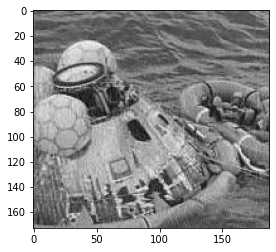

In [5]:
X = np.array(mpimg.imread("x1.bmp"))

X = np.vstack((X, np.ones(len(X[0]))))

Y = mpimg.imread("y1.bmp")

X_pseudo = Greville(X)

A = Y.dot(X_pseudo)

is_correct = A.dot(X)

plt.subplot().imshow(is_correct, cmap = 'gray')
